In [45]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("aud.wav")
audio = input_data[1]

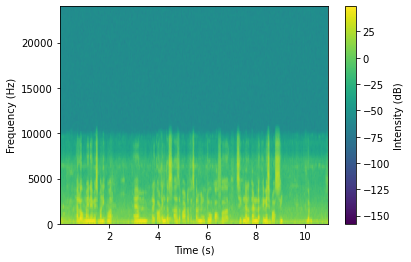

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavefile
sample_rate, samples = wavfile.read('aud.wav')

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label = 'Intensity (dB)')
plt.show()


In [53]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

def lowpass_filter(input_wav, output_wav, cutoff_frequency, sampling_rate):
    # Read the WAV file
    rate, data = wavfile.read(input_wav)

    # Normalize the data to the range [-1, 1]
    data = data / np.max(np.abs(data))

    # Design a Butterworth low-pass filter
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_frequency / nyquist
    b, a = signal.butter(5, normalized_cutoff, btype='low')

    # Apply the filter to the data
    filtered_data = signal.lfilter(b, a, data)
    print(b)
    print(a)

    # Scale the data back to the original range
    filtered_data = np.int16(filtered_data * 32767)

    # Save the filtered data as a new WAV file
    save_wav(output_wav,filtered_data, sampling_rate)
    #wavfile.write(output_wav, rate, filtered_data)

    return filtered_data

# File paths
input_wav = 'aud.wav'
output_wav = 'output_filtered.wav'

# Set the cutoff frequency and sampling rate
cutoff_frequency = 500  
sampling_rate = 44100    

# Perform the low-pass filtering and save the filtered WAV file
filtered_data = lowpass_filter(input_wav, output_wav, cutoff_frequency, sampling_rate)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(filtered_data, Fs=sampling_rate, cmap='viridis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Filtered WAV')
plt.colorbar(label='Intensity (dB)')
plt.show()


[5.11979794e-08 2.55989897e-07 5.11979794e-07 5.11979794e-07
 2.55989897e-07 5.11979794e-08]
[ 1.         -4.76948342  9.10427938 -8.69409576  4.15336557 -0.79406413]


NameError: name 'save_wav' is not defined

In [31]:
import pygame

def play_wav_file(file_path):
    pygame.mixer.init()
    pygame.mixer.music.load(file_path)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(10)

def main():
    # Provide the path to the original WAV file
    wav_file_path = 'aud.wav'

    # Play the original WAV file
    play_wav_file(wav_file_path)

if __name__ == "__main__":
    main()

In [36]:
import pygame

def play_wav_file(file_path):
    pygame.mixer.init()
    pygame.mixer.music.load(file_path)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(10)

def main():
    # Provide the path to the original WAV file
    wav_file_path = 'output_filtered.wav'

    # Play the original WAV file
    play_wav_file(wav_file_path)

if __name__ == "__main__":
    main()